<a href="https://colab.research.google.com/github/connect-midhunr/zomato-restaurant-clustering-and-sentiment-analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Business Task

Analyse the metadata and reviews of popular restaurants in Hyderabad and build machine learning models to cluster the restaurants into different segments based on cuisines and analyze the sentiments of the reviews given by the customers. 

# Data Summary

In [190]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Restaurant Metadata

In [191]:
# reading data and storing in dataframe
import pandas as pd

meta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Unsupervised Machine Learning/Zomato Restaurant Clustering and Sentiment Analysis - Midhun R/Data & Resources/Zomato Restaurant names and Metadata.csv')

In [192]:
# exploring the head of the dataframe
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [193]:
# brief summary of the dataframe
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


All features are categorical.

In [194]:
# function to find the number of duplicate rows
def duplicate_rows_count(dataframe):
  """
  Returns the number of duplicate rows in the dataframe.
  """
  return dataframe[dataframe.duplicated()].shape[0]

In [195]:
# total number of rows in the dataframe
print(f"Total number of rows: {meta_df.shape[0]}")

# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(meta_df)}")

Total number of rows: 105
Number of duplicate rows: 0


*   The dataframe contains 105 rows and has zero duplicate rows.

In [196]:
# information of features
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


*   The dataframe contains 6 columns.
*   Two columns have missing values.
*   Two columns requires conversion of datatype.

## Restaurant Review Data

In [197]:
# reading data and storing in dataframe
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Unsupervised Machine Learning/Zomato Restaurant Clustering and Sentiment Analysis - Midhun R/Data & Resources/Zomato Restaurant reviews.csv')

In [198]:
# exploring the head of the dataframe
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [199]:
# brief summary of the dataframe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


All features are categorical except Pictures.

In [200]:
# total number of rows in the dataframe
print(f"Total number of rows: {review_df.shape[0]}")

# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(review_df)}")

Total number of rows: 10000
Number of duplicate rows: 36


*   The dataframe contains 10000 rows and has 36 duplicate rows.

In [201]:
# information of features
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


*   The dataframe contains 7 columns.
*   Five columns have missing values.
*   Two columns require conversion of datatype.

# Data Cleaning

Let's take a copy of both the datasets and work on them so that the original data don't get modified.

In [202]:
# copyong datasets
meta_work_df = meta_df.copy()
review_work_df = review_df.copy()

## Removing Duplicate Rows

There are no duplicate rows to remove in restaurant metadata but it was found that there are 36 duplicate rows in review dataset. Let's remove these 36 rows of data.

In [203]:
# removing duplicate rows
review_work_df.drop_duplicates(inplace=True)

In [204]:
# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(review_work_df)}")

Number of duplicate rows: 0


## Handling Missing Values

In [205]:
# defining a function to find the number and percentage of missing values
def missing_values_count_percent(dataframe):
  """
  Returns the number and percentage of missing values in each column in the dataframe if present
  """
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = round(count/dataframe.shape[0]*100, 2)
    if count > 0:
      print(f"{column}: {count}({percentage}%)")
      num += 1
  if num == 0:
    print("There are no missing values in the dataframe.")

Let's find the number of missing values in the restaurant metadata.

In [206]:
# number of missing values in restaurant metadata
missing_values_count_percent(meta_work_df)

Collections: 54(51.43%)
Timings: 1(0.95%)


More than half of the observations of restaurant metadata have missing values in Collections. Imputing missing values in this feature is possible only by collecting more data. So let's remove this feature altogether since it will lead to inaccurate data analysis.

In [207]:
# dropping Collections
meta_work_df.drop('Collections', inplace=True, axis=1)

There is only 1 missing value in Timings. Let's check in which row it occurs.

In [208]:
# the row in which Timings is null
meta_work_df[meta_work_df['Timings'].isnull()]

,Name,Links,Cost,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,"Andhra, South Indian, North Indian",NaN


Let's impute the missing value with the mode of Timings.

In [209]:
# imputing missing value with mode
meta_work_df.fillna(meta_work_df['Timings'].mode()[0], inplace=True)

In [210]:
# number of missing values in restaurant metadata
missing_values_count_percent(meta_work_df)

There are no missing values in the dataframe.


Let's find the number of missing values in the review dataset.

In [211]:
# number of missing values in review dataset
missing_values_count_percent(review_work_df)

Reviewer: 2(0.02%)
Review: 9(0.09%)
Rating: 2(0.02%)
Metadata: 2(0.02%)
Time: 2(0.02%)


Since this is a very small number of data, let's remove these observations.

In [212]:
# dropping rows which have missing values
review_work_df.dropna(inplace=True)

In [213]:
# number of missing values in review dataset
missing_values_count_percent(review_work_df)

There are no missing values in the dataframe.


## Conversion of Column Datatype

Let's convert the data type of Cost in restaurant metadata to int.

In [243]:
# converting the datatype of Cost from object to int
meta_work_df['Cost'] = meta_work_df['Cost'].str.replace(',', '')
meta_work_df = meta_work_df.astype({'Cost':int})

The datatype of Cuisines in restaurant metadata needs to be converted to list for easier analysis.

In [244]:
# converting the datatype of Cuisines from object to list
meta_work_df['Cuisines'] = meta_work_df['Cuisines'].str.split(', ')

# exploring the head of the dataframe
meta_work_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


The datatype of Rating in review dataset is supposed to be float. But it is of object datatype. The unique values in Rating should be checked to see why this happened.

In [215]:
# unique values in Rating
print(review_work_df['Rating'].unique())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like']


The datatype of Rating was determined as object due to the presense of 'Like'. Lets replace 'Like' with an appropriate rating of 3.5.

In [230]:
# replacing 'Like' with 3.5
review_work_df['Rating'] = review_work_df['Rating'].replace('Like', 3.5)

# converting datatype of Rating to float
review_work_df = review_work_df.astype({'Rating':float})

The most appropriate datatype for Metadata in review dataset is dictionary. So let's convert the daytype of Metadata to dictionary with keys 'Review' and 'Followers'.

In [232]:
# defining a function for applying to each row for converting Metadata to dictionary
def convert_to_metadata_dict(val):
  split_val = str(val).split()
  metadata_dict = {'Reviews':int(split_val[0]), 'Followers':0}
  if len(split_val) > 2:
    metadata_dict['Followers'] = int(split_val[3])
  return metadata_dict

# applying function to each value in Metadata
review_work_df['Metadata'] = review_work_df['Metadata'].apply(lambda x : convert_to_metadata_dict(x))

# exploring the head of the dataframe
review_work_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"{'Reviews': 1, 'Followers': 2}",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"{'Reviews': 3, 'Followers': 2}",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"{'Reviews': 2, 'Followers': 3}",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"{'Reviews': 1, 'Followers': 1}",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"{'Reviews': 3, 'Followers': 2}",5/24/2019 21:37,0


Let's convert the data type of Time in review dataset to datetime.

In [233]:
# converting the datatype of Time from object to datetime
review_work_df['Time'] = pd.to_datetime(review_work_df['Time'])

## Merging of Datasets

Lets merge the two datasets for easier data analysis.

In [234]:
# merging the datasets
restaurant_df = meta_work_df.merge(right=review_work_df, left_on='Name', right_on='Restaurant').drop('Restaurant', axis=1).rename(columns={'Name':'Restaurant'})

# exploring the head of the dataframe
restaurant_df.head()

,Restaurant,Links,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"{'Reviews': 1, 'Followers': 2}",2019-05-25 15:54:00,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"{'Reviews': 3, 'Followers': 2}",2019-05-25 14:20:00,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"{'Reviews': 2, 'Followers': 3}",2019-05-24 22:54:00,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"{'Reviews': 1, 'Followers': 1}",2019-05-24 22:11:00,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"{'Reviews': 3, 'Followers': 2}",2019-05-24 21:37:00,0


# Exploratory Data Analysis

In [235]:
# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# filtering warining
import warnings
warnings.filterwarnings('ignore')

In [236]:
meta_work_df.head(2)

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [237]:
review_work_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"{'Reviews': 1, 'Followers': 2}",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"{'Reviews': 3, 'Followers': 2}",2019-05-25 14:20:00,0


In [238]:
review_work_df[review_work_df['Reviewer'] == 'Ankita']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
858,Hyper Local,Ankita,We liked the chhole bhature as it was not at a...,4.0,"{'Reviews': 10, 'Followers': 8}",2019-04-07 17:29:00,0
1278,Absolute Sizzlers,Ankita,A Friday outing in Absolute Sizzlers. Quite po...,4.0,"{'Reviews': 76, 'Followers': 211}",2019-03-13 13:22:00,5
1362,The Lal Street - Bar Exchange,Ankita,A good place to hangout. They have indoor as w...,4.0,"{'Reviews': 10, 'Followers': 8}",2019-04-07 17:31:00,0
2194,Jonathan's Kitchen - Holiday Inn Express & Suites,Ankita,A quick dinner for last Sunday of 2018 landed ...,4.0,"{'Reviews': 76, 'Followers': 211}",2019-01-02 17:20:00,1
2484,SKYHY,Ankita,"So beautiful, great DJ nights, economic, great...",5.0,"{'Reviews': 10, 'Followers': 179}",2018-10-02 14:10:00,0
3641,Banana Leaf Multicuisine Restaurant,Ankita,Buffet system is so cool. Just loved the food....,5.0,"{'Reviews': 10, 'Followers': 179}",2018-10-02 14:03:00,0
3706,Kritunga Restaurant,Ankita,We had picked up Sambar rice to satiate the cr...,3.0,"{'Reviews': 76, 'Followers': 211}",2019-04-15 12:28:00,0
4315,The Foodie Monster Kitchen,Ankita,"Located near DLF, IIIT - This small place is m...",4.0,"{'Reviews': 76, 'Followers': 211}",2019-02-08 10:55:00,1
4612,Ulavacharu,Ankita,Undoubtedly pocket friendly place.\nWe had chi...,4.0,"{'Reviews': 76, 'Followers': 211}",2019-05-04 09:21:00,3
4818,Udipi's Upahar,Ankita,"Good food, loved the south Indian dishes over ...",4.0,"{'Reviews': 10, 'Followers': 179}",2018-10-02 13:57:00,0


In [239]:
print(review_work_df['Reviewer'].value_counts())

Ankita              13
Parijat Ray         13
Kiran               12
Jay Mehta           11
Vedant Killa        11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7442, dtype: int64


## Most Expensive Restaurants

In [240]:
# defining a function to plot a vertical bar graph
def plot_vertical_bar_graph(dataframe, x, y):
  """
  Plots a vertical bar graph with 
  dataframe[x] as x-axis data 
  and dataframe[y] as y-axis data
  """
  plt.figure(figsize=(16, 6))
  sns.barplot(dataframe[x], dataframe[y])
  if dataframe[x].str.len().max() > 15:
    plt.xticks(rotation=90)
  plt.show()

Let's find out the 10 most expensive restaurants among the dataset.

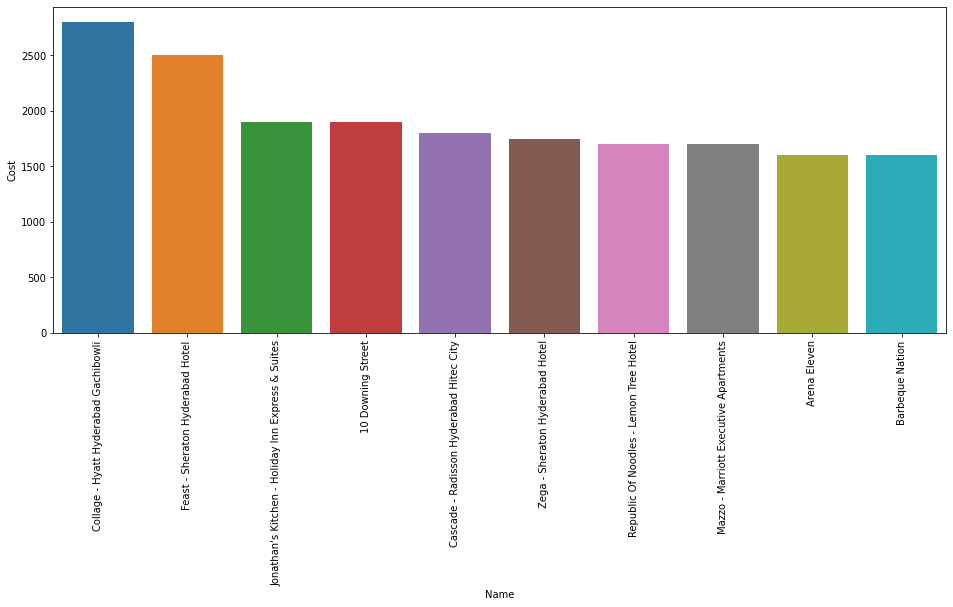

In [245]:
# plotting a vertical bar graph to display the top 10 most expensive restaurants
plot_vertical_bar_graph(meta_work_df.loc[:, ['Name', 'Cost']].sort_values('Cost', ascending=False).head(10), 'Name', 'Cost')

Collage - Hyatt Hyderabad Gachibowli is the most expensive follwed by Feast - Sheraton Hyderabad Hotel.

## Most Affordable Restaurants

Let's find out 10 most affordable restaurants in the dataset

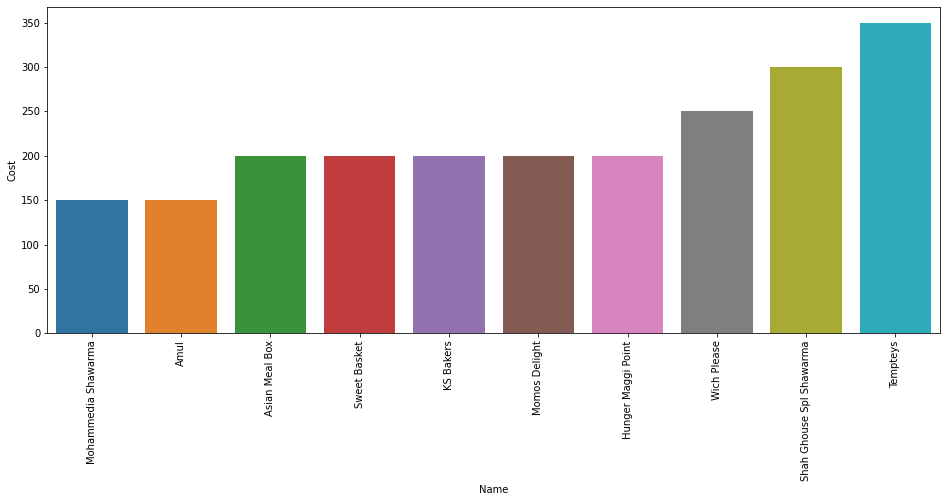

In [246]:
# plotting a vertical bar graph to display the top 10 most affordable restaurants
plot_vertical_bar_graph(meta_work_df.loc[:, ['Name', 'Cost']].sort_values('Cost').head(10), 'Name', 'Cost')

Mohammedia Shawarma and Amul are the most affordable restaurants.

## Most Available Cuisines

Let's check the 10 most available cuisines among all the restaurants.

In [247]:
# creating a dictionary to store the number of restaurants a particular cuisine 
# is served
cuisine_count = {'Cuisine':[], 'Count':[]}
for cuisine_list in meta_work_df.Cuisines:
  for cuisine in cuisine_list:
    if cuisine not in cuisine_count['Cuisine']:
      cuisine_count['Cuisine'].append(cuisine)
      cuisine_count['Count'].append(1)
    else:
      cuisine_count['Count'][cuisine_count['Cuisine'].index(cuisine)] += 1

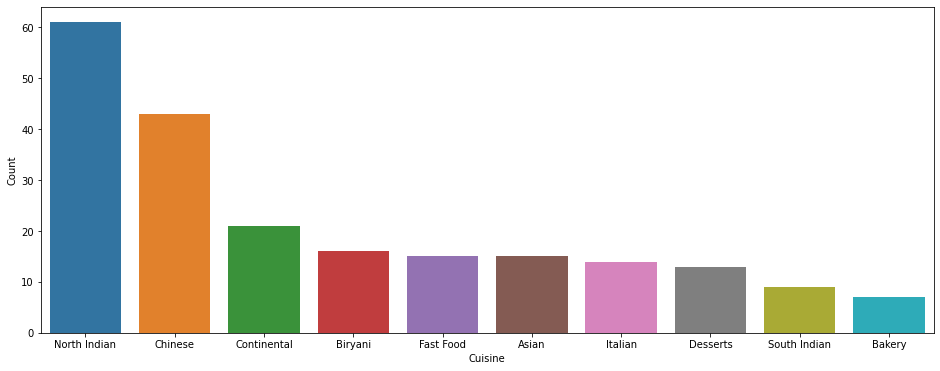

In [248]:
# converting the cuisine count dictionary to a dataframe with 10 most available cuisines
cuisine_count_most_df = pd.DataFrame(cuisine_count).sort_values('Count', ascending=False).head(10)

# plotting a vertical bar graph to display the most available cuisines
plot_vertical_bar_graph(cuisine_count_most_df, 'Cuisine', 'Count')

## Percentage of Ratings

Let's create a pie chart to check the percentage of rating for all restaurants.

In [272]:
# defining a function to generate density plots of a feature in a dataframe
def density_plot_of_a_feature(dataframe, feature):
  plt.figure(figsize=(8, 6))
  plt.hist(dataframe[feature], bins=range(1, int(dataframe[feature].max()) + 2))
  plt.show()

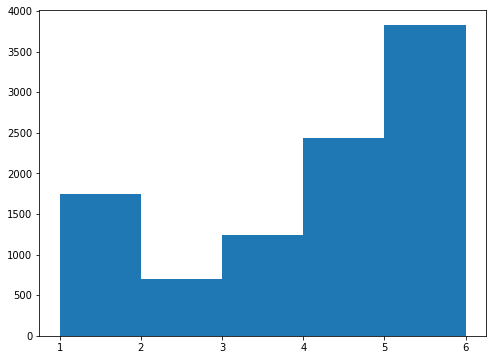

In [273]:
# generating a density plot to display the distribution of values in Rating
density_plot_of_a_feature(review_work_df, 'Rating')

It is found the the interval between 4 and 5 has the most frequency of Rating.